# Rank-Order Assignment Function Demo
### Authors: @Alexandra Cheng, @Sai Koukuntla, @Nelson Wu

Introduction:

This demo script explores the mathematical optimization of an objective function to find an optimal solution for doctor-patient assignments. While the optimization guarantees an optimal solution, it is essential to note that Integer Linear Programming (ILP) is an NP-hard problem. As a result, the time complexity can escalate exponentially with increasing problem scale. Instead of rigorously testing the function's ability to find optimal solutions, this demo illustrates the relationship between computational time and problem scale.

Key Terms:
- Problem Scale: The scale of the problem is determined by two factors: the number of variables and the number of constraints.

Assumptions:
- Doctor Preferences: Doctors do not have patient preferences, as they are not allowed to express them.
- Patient Assignment: If the total capacity of doctors exceeds the number of patients, every patient is guaranteed an assignment. Otherwise, some patients may not be assigned.
- Patient Ranking: Each patient ranks every doctor.
- Ties: Ties in rankings are permitted.
- Doctor Capacity: Doctors may have varying capacities.
- Preference Values: Preferences must be integers, in line with the ILP approach. A patient's maximum preference for any doctor is equal to the total number of doctors, while the minimum is 1.

References:
- Linear Programming (LP) Optimizatino with PuLP: https://coin-or.github.io/pulp/

Import necessary packages.

In [6]:
from RankOrder_LIP import *
import numpy as np
import time
import matplotlib.pyplot as plt

This test case serves to validate the function's capability to identify the optimal doctor-patient assignments. In this context, a higher preference value indicates a stronger preference.

In [5]:
# Test the function
preferences = [      # higher number == more preferred
    [3, 2, 1],
    [3, 1, 2],
    [3, 2, 1],
    [1, 3, 2]
]
doctor_capacity = [3, 2, 2]

assignments = ilp_assignment(preferences, doctor_capacity)
print("Assignments:", assignments)

The following code cell is designed to test the scalability of the 'ilp_assignment' function that we created, which finds the optimal doctor-patient assignments based on given preferences and capacities.

Key Variales:
- sizes: An array of problem sizes, generated using logarithmic spacing. It contains six different sizes to test.
- time: An array to store the time taken for each test case, initialized with zeros and having the same shape as sizes.
- preferences: A list of lists, where each inner list contains a permutation of preferences for a patient.
- capacity: A list representing the capacity of each doctor, initialized to 2 for each doctor in this example.

In [7]:
# testing scalability
sizes = np.logspace(1, 3, num=6, dtype=int)
times = np.zeros_like(sizes, dtype=float)

for i, size in enumerate(sizes):
    print(f"Running test for problem size: {size}")
    
    # generate random preference list
    preferences = []
    for j in range(size):
        preferences.append(list(np.random.permutation(np.arange(1,size+1))))
    capacity = [2] * size
        
    # run algorithm
    start = time.time_ns()
    assignments = ilp_assignment(preferences, capacity)
    times[i] = time.time_ns() - start

Running test for problem size: 10
Running test for problem size: 25
Running test for problem size: 63
Running test for problem size: 158
Running test for problem size: 398
Running test for problem size: 1000


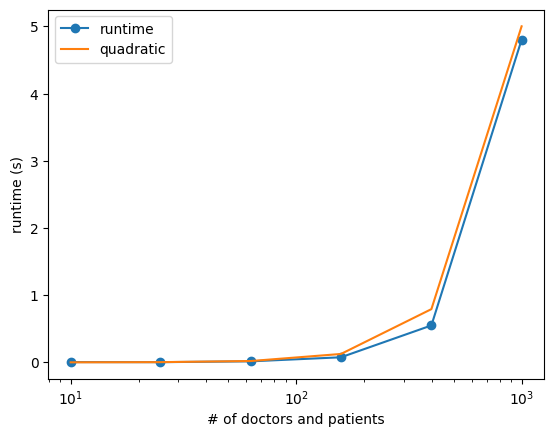

In [8]:
plt.plot(sizes, times/10e9, marker='o', label='runtime'); 
plt.plot(sizes, sizes**2/200000, label='quadratic')
plt.xlabel("# of doctors and patients"); plt.ylabel("runtime (s)");
plt.semilogx(); plt.legend();

The runtime curve closely approximates the quadratic time complexity curve, suggesting a similar scaling behavior.